# Expanding our sample of PSBs to all CPSBs and RPSBs in chen+2019
There is no reason to only focus on the 15 from Kate, so we are also getting, masking, treating and stacking the spectra of an additional 57 MaNGA PSBs. Kate noted that the PCA maps supplied are done in DR15, instead of the most up to date DR17 of SDSS, so masking may change later on.

In [15]:
import numpy as np
import marvin
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
from PyAstronomy import pyasl
from astropy.io import fits

Chen+2019 tables come in MaNGA IDs, need to convert them into plateifu ids

In [17]:
CPSB_mangaids = open('chen2019CPSB_mangaid.txt', 'r').read().split('\n')[:-1]
CPSB_mangaids = [idi[:-1] for idi in CPSB_mangaids]
print(CPSB_mangaids)

RPSB_mangaids = open('chen2019RPSB_mangaid.txt', 'r').read().split('\n')[:-1]
RPSB_mangaids = [idi[:-1] for idi in RPSB_mangaids]
print(RPSB_mangaids)

[WARNING]: unclosed file <_io.TextIOWrapper name='chen2019CPSB_mangaid.txt' mode='r' encoding='UTF-8'> (ResourceWarning)
[WARNING]: unclosed file <_io.TextIOWrapper name='chen2019RPSB_mangaid.txt' mode='r' encoding='UTF-8'> (ResourceWarning)


['1-134964', '1-146344', '1-149589', '1-149709', '1-152474', '1-163965', '1-178374', '1-178823', '1-179682', '1-210114', '1-248389', '1-250969', '1-295343', '1-29809', '1-301834', '1-38062', '1-38166', '1-38374', '1-384400', '1-384486', '1-385499', '1-404249', '1-43584', '1-44447', '1-456744', '1-456850', '1-457004', '1-457130', '1-560826', '1-72913', '12-98126']
['1-134004', '1-149557', '1-153247', '1-167582', '1-201355', '1-211002', '1-216976', '1-217015', '1-217221', '1-258306', '1-258380', '1-277246', '1-277691', '1-29512', '1-321354', '1-373878', '1-37862', '1-38041', '1-38168', '1-38470', '1-386695', '1-387081', '1-392007', '1-405760', '1-419380', '1-456309', '1-456915', '1-457200', '1-548626', '1-558926', '1-574504', '1-585632', '1-606105', '1-625070', '1-626502', '1-630590', '1-633000']


In [34]:
CPSB_ifu = []
for idi in CPSB_mangaids:
    DRPcube = marvin.tools.Cube(mangaid=idi)
    CPSB_ifu.append(DRPcube.plateifu)
    if DRPcube.mode == 'remote':
        DRPcube.download()
    DAPcube = marvin.tools.ModelCube(mangaid=idi)
    if DAPcube.mode == 'remote':
        DAPcube.download()
    maps = marvin.tools.Maps(mangaid=idi)
    if maps.mode == 'remote':
        maps.download()

[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: subprocess 7060 is still running (ResourceWarning)
[WARNING]: unclosed file <_io.TextIOWrapper name='/var/folders/b6/v8j2_cv93bq_2tsqlfdv4m3h0000gn/T/sdss_access/20220203_002/sdss_access_00.log' mode='w' encoding='UTF-8'> (ResourceWarning)
[WARNING]: unclosed file <_io.TextIOWrapper name='/var/folders/b6/v8j2_cv93bq_2tsqlfdv4m3h0000gn/T/sdss_access/20220203_002/sdss_access_00.err' mode='w' encoding='UTF-8'> (ResourceWarning)
[WARNING]: unclosed file <_io.TextIOWrapper name='/var/folders/b6/v8j2_cv93bq_2tsqlfdv4m3h0000gn/T/sdss_access/20220203_022/sdss_access_00.log' mode='w' encoding='UTF-8'> (ResourceWarning)
[WARNING]: unclosed file <_io.TextIOWrapper name='/var/folders/b6/v8j2_cv93bq_2tsqlfdv4m3h0000gn/T/sdss_access/20220203_022/sds

SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [05:20<00:00, 320.45s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.02s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
Progress: 100%|██████████| 1/1 [01:45<00:00, 105.20s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:25<00:00, 85.13s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.00s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [06:00<00:00, 360.68s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [03:30<00:00, 210.30s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.02s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [05:45<00:00, 345.62s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [03:05<00:00, 185.32s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.03s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [03:25<00:00, 205.39s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:50<00:00, 110.21s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
Progress: 100%|██████████| 1/1 [02:00<00:00, 120.24s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:00<00:00, 60.10s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:10<00:00, 130.25s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.02s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
Progress: 100%|██████████| 1/1 [02:55<00:00, 175.27s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:55<00:00, 115.19s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.03s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
Progress: 100%|██████████| 1/1 [03:15<00:00, 195.39s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:20<00:00, 140.27s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [10:26<00:00, 626.18s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [07:10<00:00, 430.75s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:15<00:00, 15.04s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [10:06<00:00, 606.10s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [05:05<00:00, 305.58s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.02s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [03:55<00:00, 235.44s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:05<00:00, 125.25s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [03:40<00:00, 220.37s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:55<00:00, 115.19s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [03:40<00:00, 220.40s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:40<00:00, 100.15s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [10:06<00:00, 606.10s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [05:15<00:00, 315.58s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:20<00:00, 20.04s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [08:30<00:00, 510.91s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:05<00:00, 245.47s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:15<00:00, 15.03s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [03:20<00:00, 200.38s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:35<00:00, 95.19s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:00<00:00, 240.44s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:15<00:00, 135.25s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:05<00:00, 125.24s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:35<00:00, 95.10s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [10:31<00:00, 631.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [08:10<00:00, 490.66s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.02s/files, n_files=1, n_streams=1]

SDSS_ACCESS> Done!


In [35]:
RPSB_ifu = []
for idi in RPSB_mangaids:
    DRPcube = marvin.tools.Cube(mangaid=idi)
    RPSB_ifu.append(DRPcube.plateifu)
    if DRPcube.mode == 'remote':
        DRPcube.download()
    DAPcube = marvin.tools.ModelCube(mangaid=idi)
    if DAPcube.mode == 'remote':
        DAPcube.download()
    maps = marvin.tools.Maps(mangaid=idi)
    if maps.mode == 'remote':
        maps.download()

Progress: 100%|██████████| 1/1 [03:40<00:00, 220.24s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:35<00:00, 95.10s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:04<00:00,  4.99s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:05<00:00, 245.28s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:55<00:00, 175.21s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:35<00:00, 275.32s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [03:15<00:00, 195.24s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:00<00:00, 240.32s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [03:15<00:00, 195.24s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.00s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [03:45<00:00, 225.27s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:35<00:00, 155.21s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [11:20<00:00, 680.75s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:50<00:00, 170.17s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [08:25<00:00, 505.48s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [05:40<00:00, 340.32s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:20<00:00, 140.14s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:05<00:00, 125.12s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [06:15<00:00, 375.40s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [08:35<00:00, 515.62s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:20<00:00, 20.03s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [12:05<00:00, 725.85s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [10:40<00:00, 640.68s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [06:00<00:00, 360.32s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:10<00:00, 250.27s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.02s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:20<00:00, 260.37s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:55<00:00, 115.10s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]
[WARNING]: more than one plate-ifu found for mangaid=1-277691. Using the one with the highest SN2. (MarvinUserWarning)


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [11:41<00:00, 701.28s/files, n_files=1, n_streams=1]
[WARNING]: more than one plate-ifu found for mangaid=1-277691. Using the one with the highest SN2. (MarvinUserWarning)


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [05:15<00:00, 315.56s/files, n_files=1, n_streams=1]
[WARNING]: more than one plate-ifu found for mangaid=1-277691. Using the one with the highest SN2. (MarvinUserWarning)


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:15<00:00, 15.03s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
Progress: 100%|██████████| 1/1 [03:20<00:00, 200.35s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:00<00:00, 120.18s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:30<00:00, 270.45s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:45<00:00, 165.24s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.02s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
Progress: 100%|██████████| 1/1 [06:45<00:00, 405.67s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [03:35<00:00, 215.26s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:20<00:00, 260.46s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:45<00:00, 165.28s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.02s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:35<00:00, 95.16s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:05<00:00, 65.11s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:15<00:00, 255.42s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:50<00:00, 170.24s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:04<00:00,  5.00s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:45<00:00, 165.18s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:55<00:00, 115.13s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:40<00:00, 280.51s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:05<00:00, 125.24s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [08:10<00:00, 490.88s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [05:55<00:00, 355.60s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [07:40<00:00, 460.69s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:45<00:00, 285.47s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:15<00:00, 15.02s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [08:45<00:00, 525.92s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:20<00:00, 260.43s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.02s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:05<00:00, 245.41s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:50<00:00, 170.32s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [06:10<00:00, 370.65s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:05<00:00, 245.43s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.02s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:10<00:00, 250.42s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:55<00:00, 175.32s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [04:00<00:00, 240.39s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:30<00:00, 150.27s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:35<00:00, 95.17s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:05<00:00, 65.12s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
Progress: 100%|██████████| 1/1 [05:35<00:00, 335.57s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [03:00<00:00, 180.32s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:10<00:00, 10.02s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [02:30<00:00, 150.24s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [01:40<00:00, 100.18s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


Progress: 100%|██████████| 1/1 [00:05<00:00,  5.01s/files, n_files=1, n_streams=1]

SDSS_ACCESS> Done!


In [30]:
# write plateifu to txt file
print(CPSB_ifu)
print(RPSB_ifu)
f = open('chen2019CPSB_plateifu.txt', 'w')
for idi in CPSB_ifu:
    f.write(idi+'\n')
f.close()

f = open('chen2019RPSB_plateifu.txt', 'w')
for idi in RPSB_ifu:
    f.write(idi+'\n')
f.close()

['8555-3701', '8938-6102', '8997-3703', '8996-3704', '8144-1902', '8941-3701', '9085-1902', '8623-9102', '7964-1902', '8979-1902', '8313-6101', '8331-6104', '9047-3701', '8655-1902', '8944-1902', '8080-3702', '8081-3702', '8082-3704', '9494-3701', '9494-3703', '9493-12705', '8935-12701', '8713-3701', '8143-3703', '8950-3704', '9876-12701', '8934-9101', '8933-3704', '8315-3703', '8725-1902', '7443-12701']
['8486-1901', '8997-3704', '9184-3703', '8453-3704', '8146-1901', '8604-3702', '8440-6104', '8440-1901', '8250-6101', '8262-3701', '8261-6103', '8255-3703', '8256-12701', '8655-3701', '9868-3702', '9891-6102', '9194-3702', '8080-3704', '8083-12703', '8085-6104', '8987-9102', '9505-6102', '8943-1901', '8323-6103', '8554-3701', '8950-6101', '8950-12705', '8932-12704', '9181-12705', '8250-6104', '9487-9102', '8439-6104', '8458-6102', '8322-1901', '8982-6104', '8547-9102', '9872-3701']


In [41]:
# check whether the ALMA samples are in chen+2019 and if they are centrals or rings
alma_targets = pd.read_fwf('PSBs_ALMAobs_sample.txt')
alma_IDs = alma_targets['plateifu']
for plateifu in alma_IDs:
    if plateifu in CPSB_ifu:
        print(plateifu, 'c')
    elif plateifu in RPSB_ifu:
        print(plateifu, 'r')
    else:
        print(plateifu, 'none')

NameError: name 'CPSB_ifu' is not defined

### Now we can set up stacking

In [4]:
# skylines
lines_air_df = pd.read_fwf('../skylines.txt')
lines_vac = pyasl.airtovac2(lines_air_df[lines_air_df['flux']>=30]['wavelength'])
print(lines_vac)

def mask_sky(wave, masksize=10):
    """ Masks strong night sky emission lines that are often not removed 
    properly in the data processing. From masksky.pro """

    lines = pyasl.vactoair2(lines_vac)
    
    mask = []
    for i in range(lines.shape[0]):
        ind = np.where((wave>lines[i]-masksize) & (wave<lines[i]+masksize))
        mask.extend(ind[0])

    return mask, np.array([lines-masksize, lines+masksize]).T

[5578.8954556  6302.05104962 6365.54219491 8346.90679765 8401.48404869
 8401.48404869 8829.53629684 8888.29629305 8922.08573476 9315.90131855
 9326.32113949 9378.54917978 9442.25973032 9479.49541313 9793.80124247
 9874.8545013  9917.49585452 9949.24175613 9959.32848922]


In [13]:
# setup functions
class galaxy:

    def __init__(self, plateifu, PSB_type):
        self.PSB_type = PSB_type
        # first get all relevent cubes and masks and fits files and PCA labels
        self.DRPcube = marvin.tools.Cube(plateifu)
        if self.DRPcube.mode == 'remote':
            self.DRPcube.download()
        self.DAPcube = marvin.tools.ModelCube(plateifu)
        if self.DAPcube.mode == 'remote':
            self.DAPcube.download()
        self.maps = marvin.tools.Maps(plateifu)
        if self.maps.mode == 'remote':
            self.maps.download()
        if self.DRPcube._release != 'DR15':
            print('wrong data release, plateifu =', plateifu)
        ha_qual = self.maps['emline_gflux_ha_6564']
        PCA_file = "./from_colaborators/chen2019_PSBs_PCAmaps/"+PSB_type+"/manga-"+plateifu+"_PCA.fits"
        self.PCA_fits = fits.open(PCA_file)
        self.PCA_qualmask = 1-self.PCA_fits[7].data
        self.PSB_mask = self.PCA_fits[10].data==5
        
        # get Ha qualmask from marvin
        nocov = ha_qual.pixmask.get_mask('NOCOV')
        lowcov = ha_qual.pixmask.get_mask('LOWCOV')
        donotuse = ha_qual.pixmask.get_mask('DONOTUSE')
        deadfiber = ha_qual.pixmask.get_mask('DEADFIBER')
        forestar = ha_qual.pixmask.get_mask('FORESTAR')
        qualmask_ = ( (nocov) | (lowcov) | (donotuse) | (deadfiber) | (forestar) )
        self.qualmask = (qualmask_==0)
        
        # Milky way reddening correction
        self.cube_redcorr = self.DAPcube._redcorr
        cube_redcorr_ = self.cube_redcorr[:,np.newaxis,np.newaxis]
        self.corrected_flux = self.DRPcube.flux.value*cube_redcorr_
        self.corrected_ivar = self.DRPcube.flux.ivar/cube_redcorr_**2
        
        self.binned_corrected_flux = self.DAPcube.binned_flux.value*cube_redcorr_
        self.binned_corrected_ivar = self.DAPcube.binned_flux.ivar/cube_redcorr_**2
        
        # SNR calculations
        self.snr = np.mean(self.DRPcube.flux.snr,axis=0)
        self.binned_snr = np.mean(self.DAPcube.binned_flux.snr,axis=0)
        
    def stack(self, binned=False, SNR_threshold=None, qualmask_choice='default', 
              vb=True):
        if binned:
            wavelength = self.DRPcube.flux.wavelength.value.copy()
            flux = self.binned_corrected_flux.copy()
            ivar = self.binned_corrected_ivar.copy()
            snr = self.binned_snr.copy()
        else:
            wavelength = self.DAPcube.binned_flux.wavelength.value.copy()
            flux = self.corrected_flux.copy()
            ivar = self.corrected_ivar.copy()
            snr = self.snr.copy()
            
        if qualmask_choice == 'default':
            qualmask = self.qualmask.copy()
        elif qualmask_choice == 'PCA':
            qualmask = self.PCA_qualmask.copy()
        elif qualmask_choice == 'both':
            qualmask = self.PCA_qualmask * self.qualmask
        
        if SNR_threshold is None:
            self.combined_mask = qualmask * self.PSB_mask
        else:
            self.combined_mask = qualmask * self.PSB_mask * (snr>SNR_threshold)
        
        self.wavelength, self.spectrum, self.errors = self.stacking(wavelength, flux, ivar, self.combined_mask)
        
        if vb:
            o_mask = (self.qualmask & (self.snr>15))
            o_wavelength, o_spectrum, o_errors = self.stacking(self.DRPcube.flux.wavelength.value.copy(), 
                                                               self.binned_corrected_flux.copy(), 
                                                               self.binned_corrected_ivar.copy(), 
                                                               o_mask)
            print("previous masking stacked mean SNR:", np.mean(o_spectrum/o_errors))
            print("this masking stacked mean SNR:", np.mean(self.spectrum/self.errors))
            
            fig = plt.figure(figsize=[10,10])
            gs = matplotlib.gridspec.GridSpec(2,2)
            ax1 = plt.subplot(gs[0,0])
            ax2 = plt.subplot(gs[0,1])
            ax3 = plt.subplot(gs[1,:])
            
            ax1.imshow(o_mask, cmap='jet')
            ax1.set_title( r"previous masking")
            ax1.set_xlabel('x[pixel]')
            ax1.set_ylabel('y[pixel]')
            ax3.plot(o_wavelength, o_spectrum, label='previous')
            ax3.fill_between(o_wavelength, o_spectrum-o_errors, o_spectrum+o_errors)
            
            ax2.imshow(self.combined_mask, cmap='jet')
            ax2.set_title( r"this masking")
            ax2.set_xlabel('x[pixel]')
            ax2.set_ylabel('y[pixel]')
            ax3.plot(self.wavelength, self.spectrum, label='this')
            ax3.fill_between(self.wavelength, self.spectrum-self.errors, self.spectrum+self.errors)
            
            ax3.legend()
            ax3.set_xlim([min(self.wavelength),max(self.wavelength)])
            ax3.set_xlabel('wavelength[$\AA$]')
            ax3.set_ylabel('$f_\lambda \;/\; erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$')
            plt.show()
        
    def stacking(self, wavelength, flux, ivar, mask):
        masked_flux = mask * flux
        
        contribution_cube = np.zeros(np.shape(masked_flux))
        contribution_cube = mask * (1-(ivar==0))
        
        valid_pix_spectrum_cube = contribution_cube * masked_flux
        valid_pix_var_cube = np.where(contribution_cube==1, 1/ivar, 0)

        contribution_list = np.sum(contribution_cube, axis=(1,2))
        spectrum = np.sum(valid_pix_spectrum_cube, axis=(1,2)) \
                   *10**-17*max(contribution_list)/contribution_list
        errors = np.sqrt(np.sum(valid_pix_var_cube, axis=(1,2))) \
                 *10**-17*max(contribution_list)/contribution_list
        
        #dropping wavelength pixels that have summed error = 0
        zero_ind = np.where((errors==0)|(contribution_list==0)|(spectrum<=0))
        wavelength = np.delete(wavelength, zero_ind)
        spectrum = np.delete(spectrum, zero_ind)
        errors = np.delete(errors, zero_ind)
        
        return wavelength, spectrum, errors
        

Test it out on one first...

[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: unclosed file <_io.FileIO name='./from_colaborators/chen2019_PSBs_PCAmaps/CPSB/manga-7443-12701_PCA.fits' mode='rb' closefd=True> (ResourceWarning)


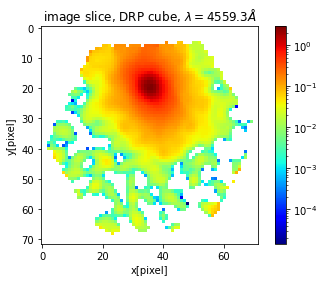

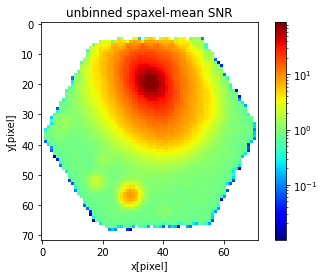

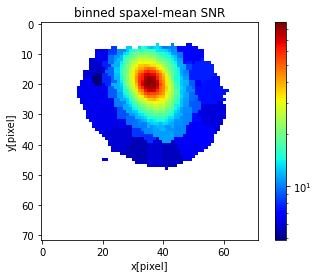

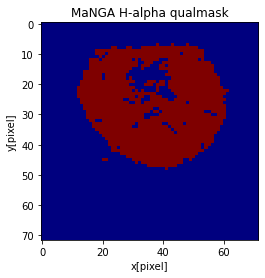

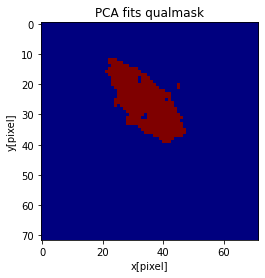

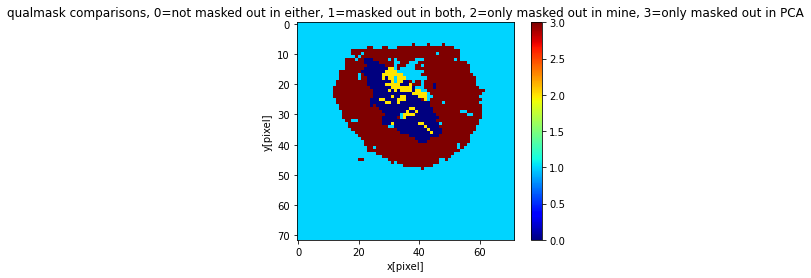

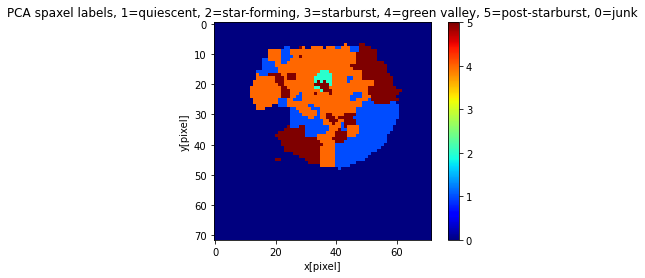

In [16]:
plateifu = '7443-12701'
gal = galaxy(plateifu, 'CPSB')

#flux
idx = 1000
plt.imshow(gal.corrected_flux[idx], norm=LogNorm(), cmap='jet')
plt.colorbar()
plt.title( r"image slice, DRP cube, $\lambda=%.1f\AA$" %gal.DRPcube.flux.wavelength[idx].value)
plt.xlabel('x[pixel]')
plt.ylabel('y[pixel]')
plt.show()

#unbinned SNR
plt.imshow(gal.snr, norm=LogNorm(), cmap='jet')
plt.colorbar()
plt.title( "unbinned spaxel-mean SNR")
plt.xlabel('x[pixel]')
plt.ylabel('y[pixel]')
plt.show()

#binned SNR
plt.imshow(gal.binned_snr, norm=LogNorm(), cmap='jet')
plt.colorbar()
plt.title( "binned spaxel-mean SNR")
plt.xlabel('x[pixel]')
plt.ylabel('y[pixel]')
plt.show()

#MaNGA Ha qualmask
plt.imshow(gal.qualmask, cmap='jet')
plt.title( "MaNGA H-alpha qualmask")
plt.xlabel('x[pixel]')
plt.ylabel('y[pixel]')
plt.show()

#PCA fits qualmask
plt.imshow(gal.PCA_qualmask, cmap='jet')
plt.title( "PCA fits qualmask")
plt.xlabel('x[pixel]')
plt.ylabel('y[pixel]')
plt.show()

#qualmask comparison
common_mask = (1-gal.qualmask) * (1-gal.PCA_qualmask)
only_mine_mask = (1-gal.qualmask) * gal.PCA_qualmask * 2
only_PCA_mask = gal.qualmask * (1-gal.PCA_qualmask) * 3
qualmask_map = common_mask + only_mine_mask + only_PCA_mask
plt.imshow(qualmask_map, cmap='jet')
plt.title("qualmask comparisons, 0=not masked out in either, 1=masked out in both, 2=only masked out in mine, 3=only masked out in PCA")
plt.colorbar()
plt.xlabel('x[pixel]')
plt.ylabel('y[pixel]')
plt.show()

#PCA classifications
temp_map = gal.PCA_fits[10].data.copy()
mask = gal.PCA_fits[10].data<0
temp_map[mask] = 0
plt.imshow(temp_map, cmap='jet')
plt.colorbar()
plt.title( "PCA spaxel labels, 1=quiescent, 2=star-forming, 3=starburst, 4=green valley, 5=post-starburst, 0=junk")
plt.xlabel('x[pixel]')
plt.ylabel('y[pixel]')
plt.show()

Now stack of them, at once. The square plots below are ordered such that the top set = CPSBs, bottom set = RPSBs. Plateifu labels in white/black = new targets from Chen+2019, labels in red/green = repeated targets from Kate's ALMA sample

In [27]:
CPSB_IDs = open('chen2019CPSB_plateifu.txt','r').read().split('\n')[:-1]

CPSBs = {}
for plateifu in CPSB_IDs:
    gal = galaxy(plateifu, 'CPSB')
    gal.stack(binned=True, SNR_threshold=None, qualmask_choice='both', vb=False)
    CPSBs[plateifu] = gal
    
RPSB_IDs = open('chen2019RPSB_plateifu.txt','r').read().split('\n')[:-1]

RPSBs = {}
for plateifu in RPSB_IDs:
    gal = galaxy(plateifu, 'RPSB')
    gal.stack(binned=True, SNR_threshold=None, qualmask_choice='both', vb=False)
    RPSBs[plateifu] = gal

[WARNING]: unclosed file <_io.TextIOWrapper name='chen2019CPSB_plateifu.txt' mode='r' encoding='UTF-8'> (ResourceWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: unclosed file <_io.FileIO name='./from_colaborators/chen2019_PSBs_PCAmaps/CPSB/manga-8555-3701_PCA.fits' mode='rb' closefd=True> (ResourceWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: divide by z

[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: unclosed file <_io.TextIOWrapper name='chen2019RPSB_plateifu.txt' mode='r' encoding='UTF-8'> (ResourceWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: mismatch between file version

[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: mismatch between file version=DR16 and object release=DR15. Setting object release to DR16 (MarvinUserWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: mismatch between file version

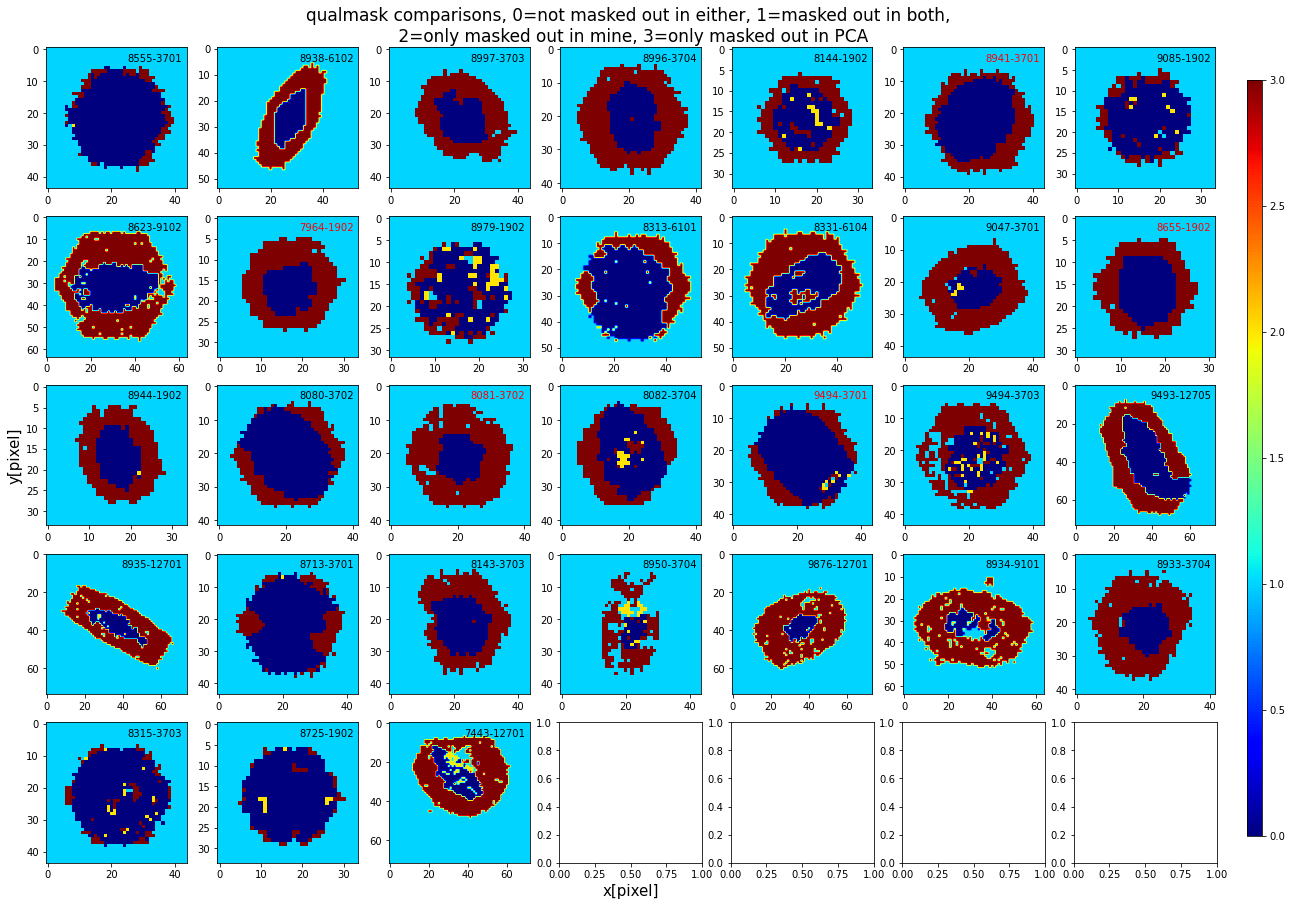

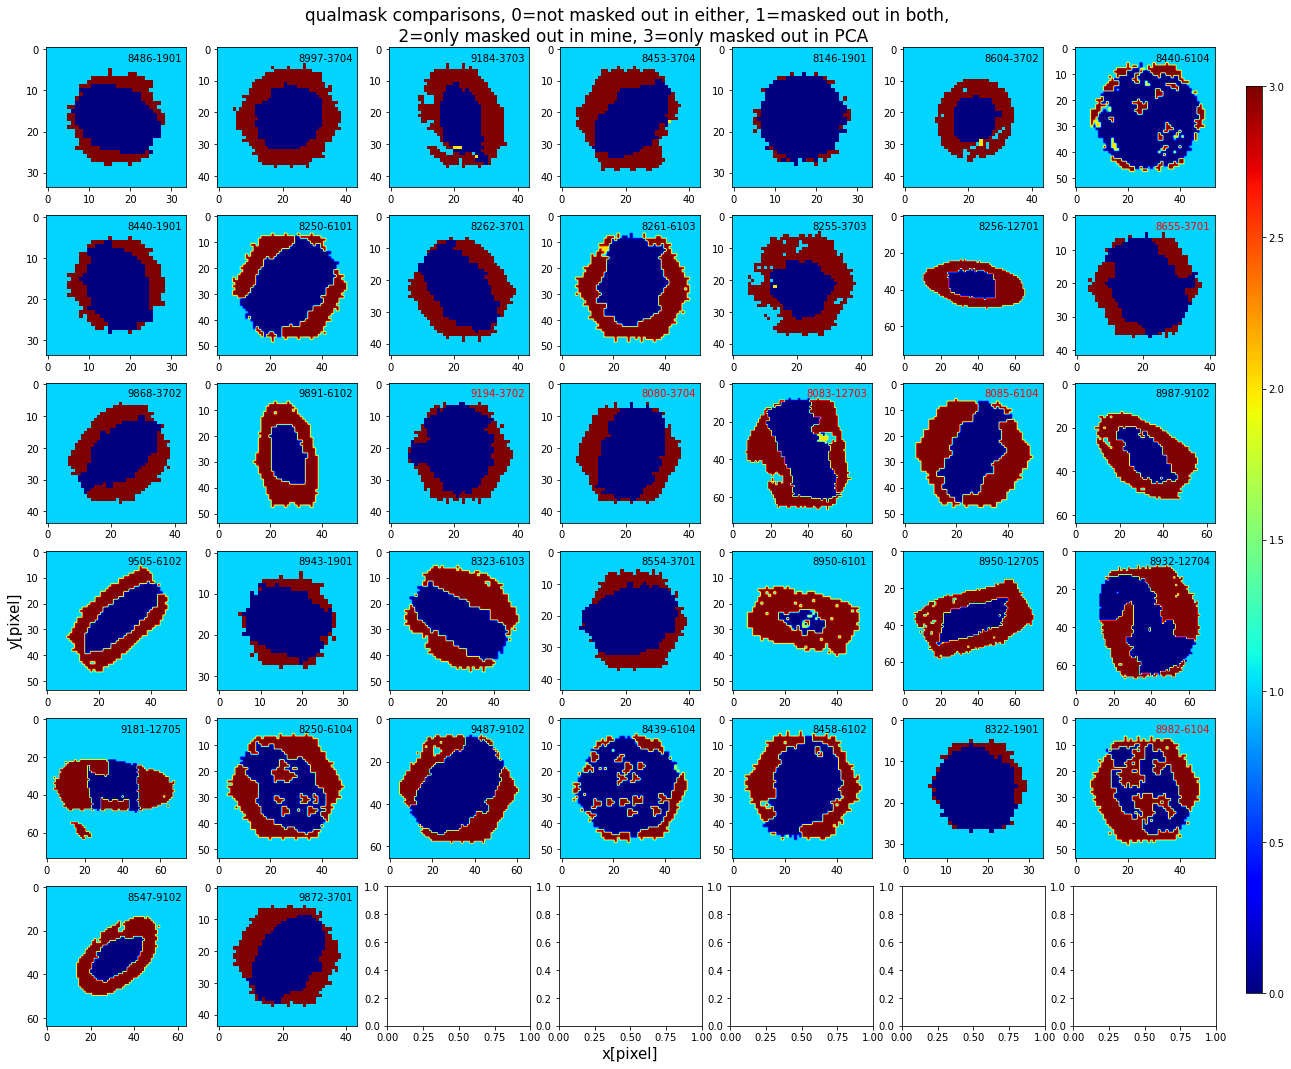

In [46]:
plots_per_row = 7

for PSB_dict in [CPSBs, RPSBs]:
    PSB_len = len(PSB_dict.keys())
    no_of_rows = PSB_len // plots_per_row + 1
    
    fig, ax = plt.subplots(no_of_rows,plots_per_row, figsize=[3*plots_per_row,3*no_of_rows])
    for i,plateifu in enumerate(PSB_dict.keys()):
        gal = PSB_dict[plateifu]
        axi = ax[i // plots_per_row, i % plots_per_row]
        #qualmask comparison
        common_mask = (1-gal.qualmask) * (1-gal.PCA_qualmask)
        only_mine_mask = (1-gal.qualmask) * gal.PCA_qualmask * 2
        only_PCA_mask = gal.qualmask * (1-gal.PCA_qualmask) * 3
        qualmask_map = common_mask + only_mine_mask + only_PCA_mask
        im = axi.imshow(qualmask_map, cmap='jet')
        if plateifu in list(alma_IDs):
            color='red'
        else: color='black'
        axi.text(0.97,0.9, plateifu, transform=axi.transAxes,color=color, ha='right')

    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
    fig.colorbar(im, cax=cbar_ax)

    ax[no_of_rows-1,int(plots_per_row/2)].set_xlabel('x[pixel]', fontsize=15)
    ax[int(no_of_rows/2),0].set_ylabel('y[pixel]', fontsize=15)
    ax[0,int(plots_per_row/2)].set_title("qualmask comparisons, 0=not masked out in either, "+\
                                         "1=masked out in both, \n 2=only masked out in mine, "+\
                                         "3=only masked out in PCA"
                      , fontsize=17)
    plt.show()

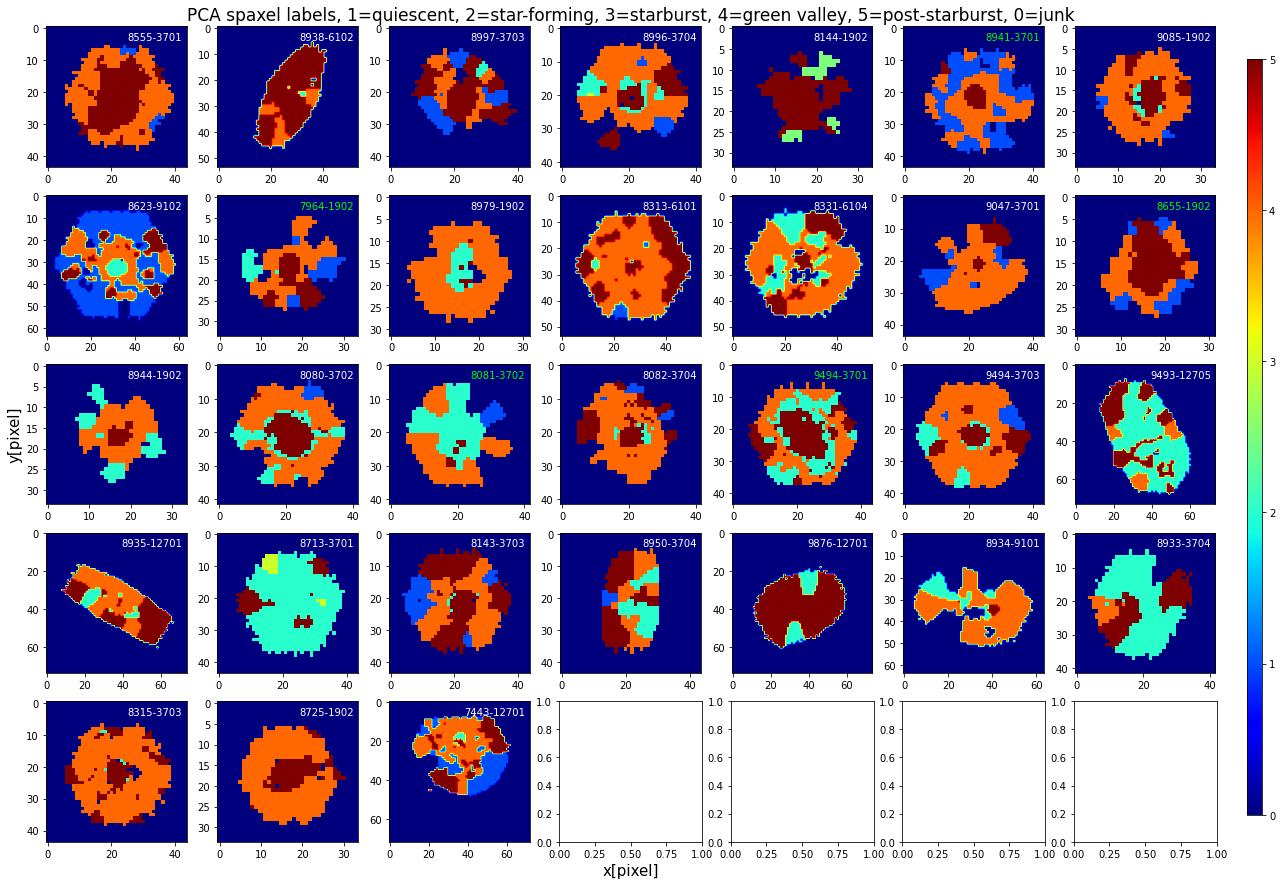

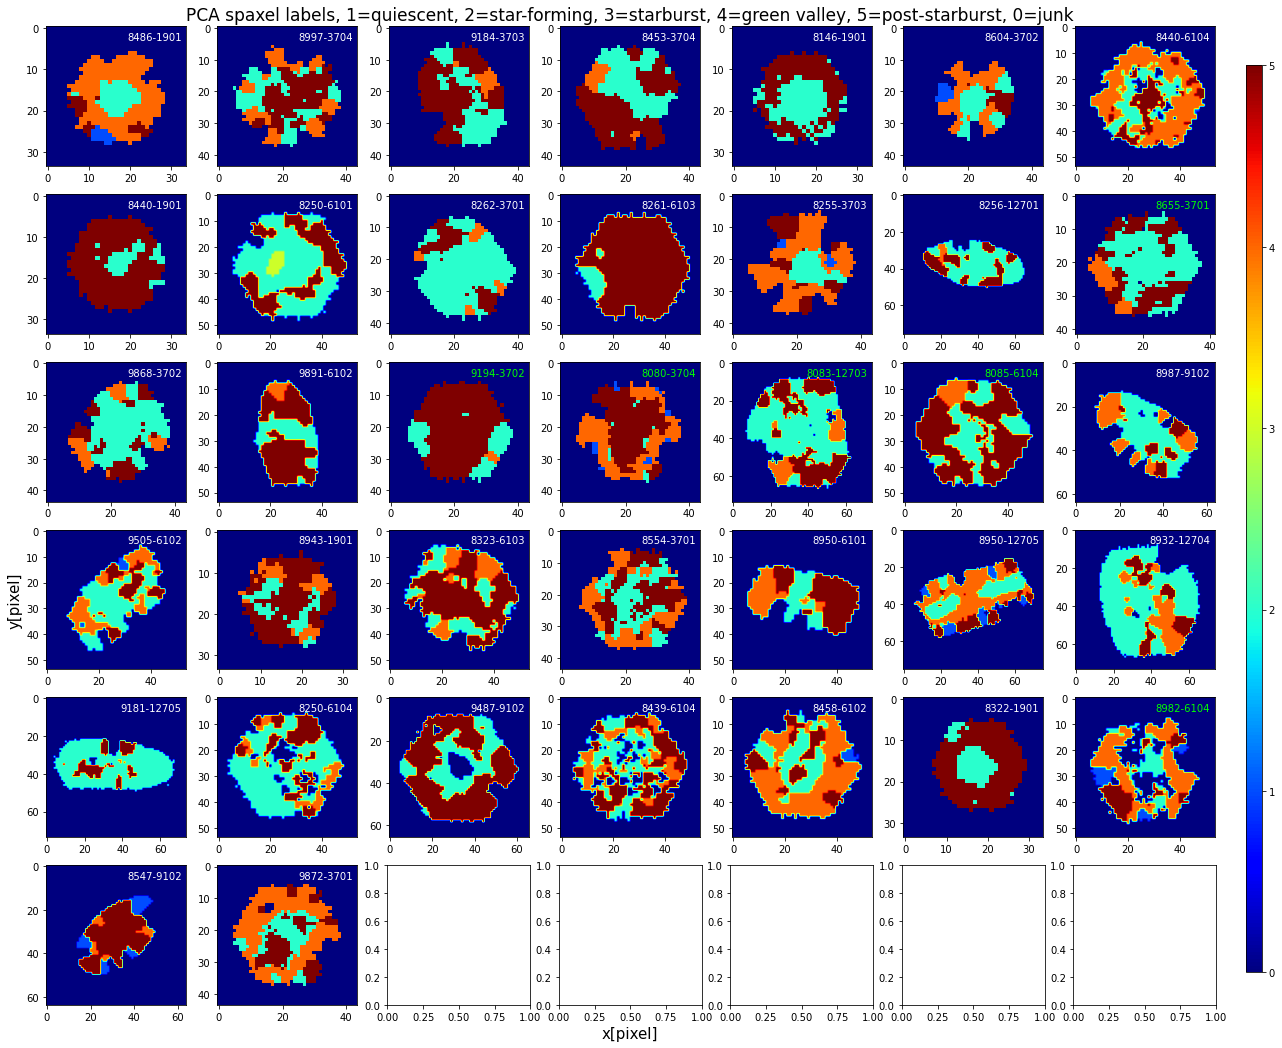

In [49]:
for PSB_dict in [CPSBs, RPSBs]:
    PSB_len = len(PSB_dict.keys())
    no_of_rows = PSB_len // plots_per_row + 1
    
    fig, ax = plt.subplots(no_of_rows,plots_per_row, figsize=[3*plots_per_row,3*no_of_rows])
    for i,plateifu in enumerate(PSB_dict.keys()):
        gal = PSB_dict[plateifu]
        axi = ax[i // plots_per_row, i % plots_per_row]
        # PCA spaxel maps
        temp_map = gal.PCA_fits[10].data.copy()
        mask = gal.PCA_fits[10].data<0
        temp_map[mask] = 0
        im = axi.imshow(temp_map, cmap='jet')
        if plateifu in list(alma_IDs):
            color='lime'
        else: color='white'
        axi.text(0.97,0.9, plateifu, transform=axi.transAxes,color=color, ha='right')

    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
    fig.colorbar(im, cax=cbar_ax)

    ax[no_of_rows-1,int(plots_per_row/2)].set_xlabel('x[pixel]', fontsize=15)
    ax[int(no_of_rows/2),0].set_ylabel('y[pixel]', fontsize=15)
    ax[0,int(plots_per_row/2)].set_title('PCA spaxel labels, 1=quiescent, 2=star-forming, '+\
                                         '3=starburst, 4=green valley, 5=post-starburst, 0=junk'
                      , fontsize=17)
    plt.show()

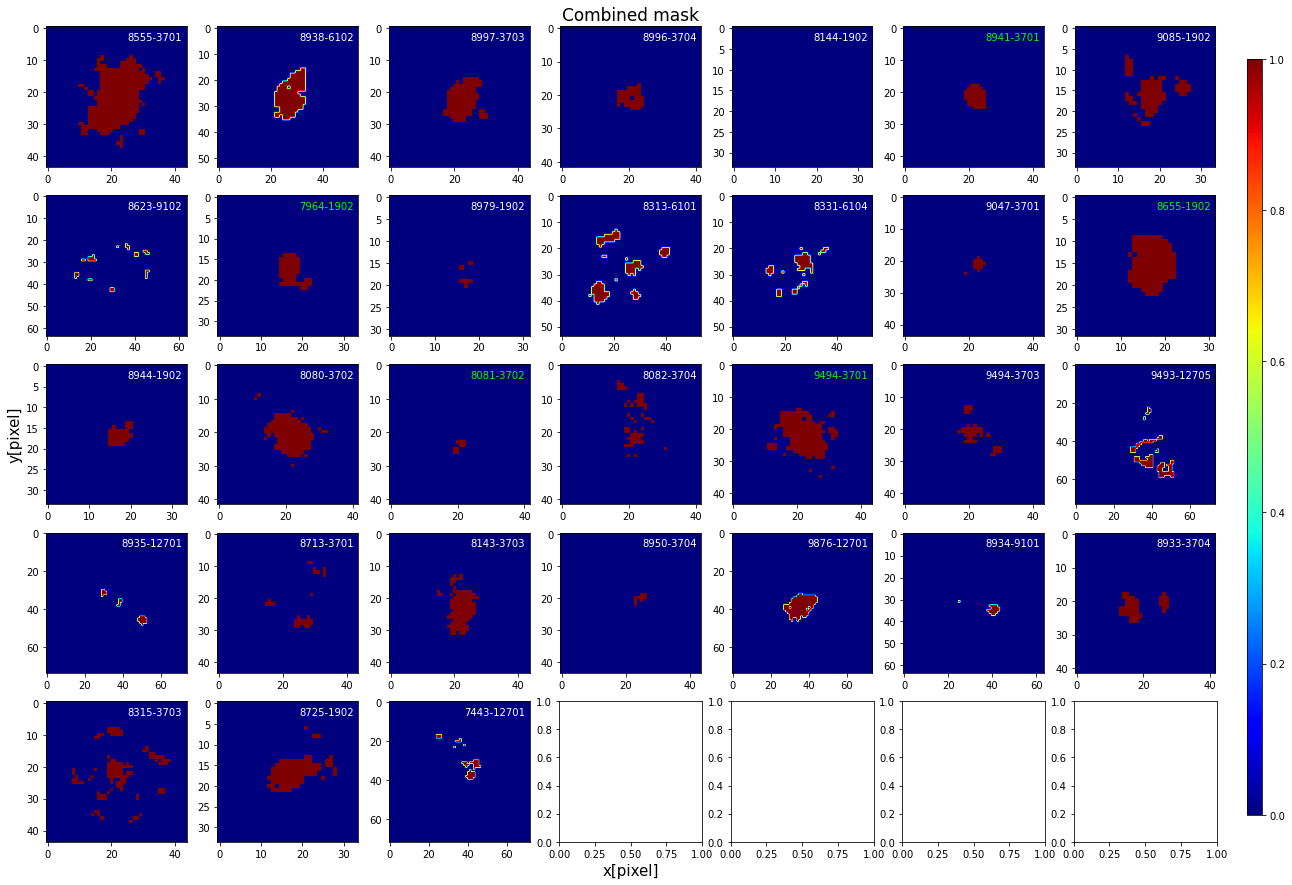

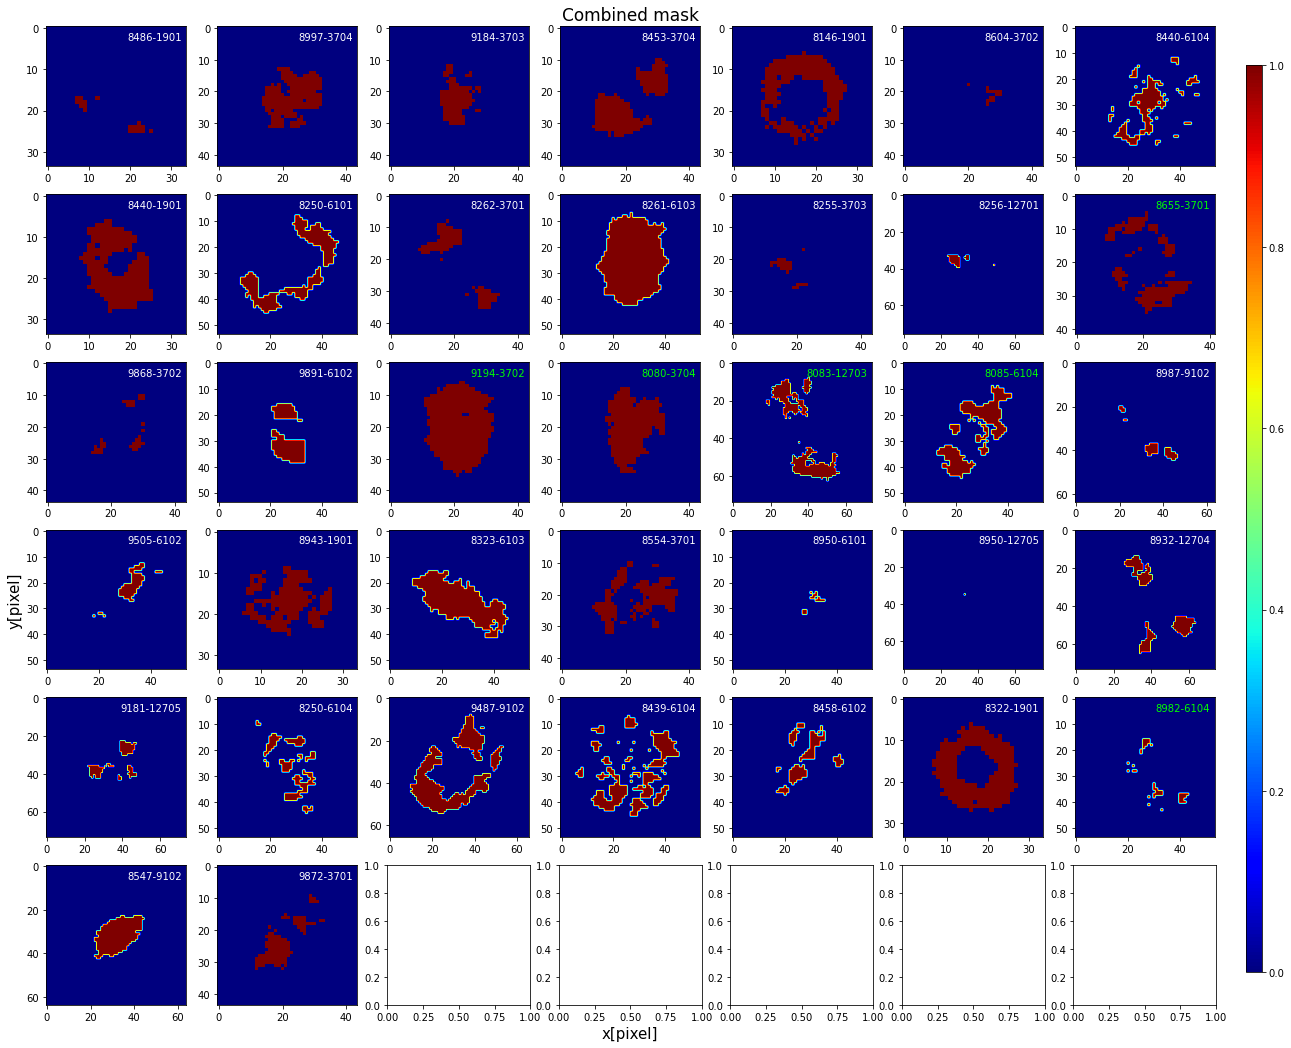

In [50]:
for PSB_dict in [CPSBs, RPSBs]:
    PSB_len = len(PSB_dict.keys())
    no_of_rows = PSB_len // plots_per_row + 1
    
    fig, ax = plt.subplots(no_of_rows,plots_per_row, figsize=[3*plots_per_row,3*no_of_rows])
    for i,plateifu in enumerate(PSB_dict.keys()):
        gal = PSB_dict[plateifu]
        axi = ax[i // plots_per_row, i % plots_per_row]
        # combined masking map
        im = axi.imshow(gal.combined_mask, cmap='jet')
        if plateifu in list(alma_IDs):
            color='lime'
        else: color='white'
        axi.text(0.97,0.9, plateifu, transform=axi.transAxes,color=color, ha='right')

    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
    fig.colorbar(im, cax=cbar_ax)

    ax[no_of_rows-1,int(plots_per_row/2)].set_xlabel('x[pixel]', fontsize=15)
    ax[int(no_of_rows/2),0].set_ylabel('y[pixel]', fontsize=15)
    ax[0,int(plots_per_row/2)].set_title('Combined mask' , fontsize=17)
    plt.show()

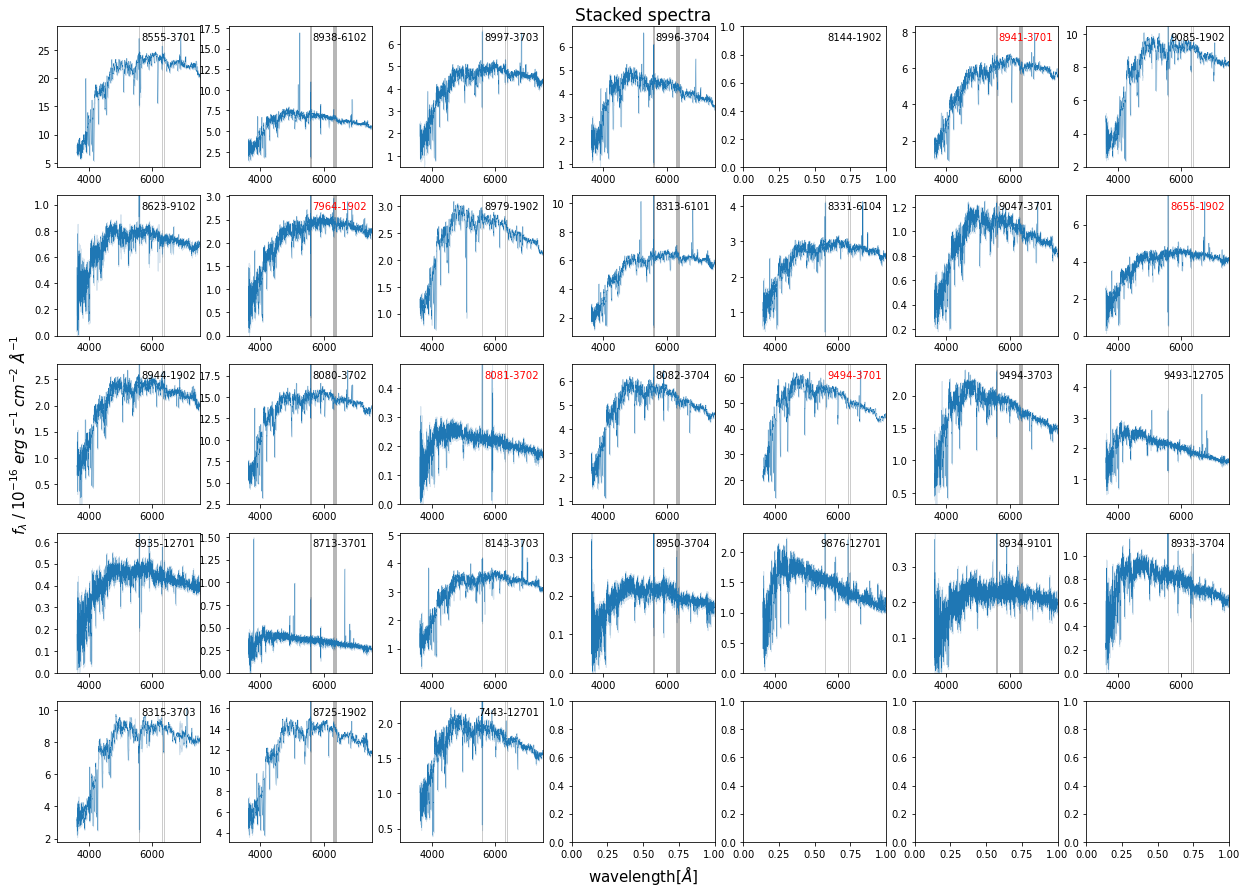

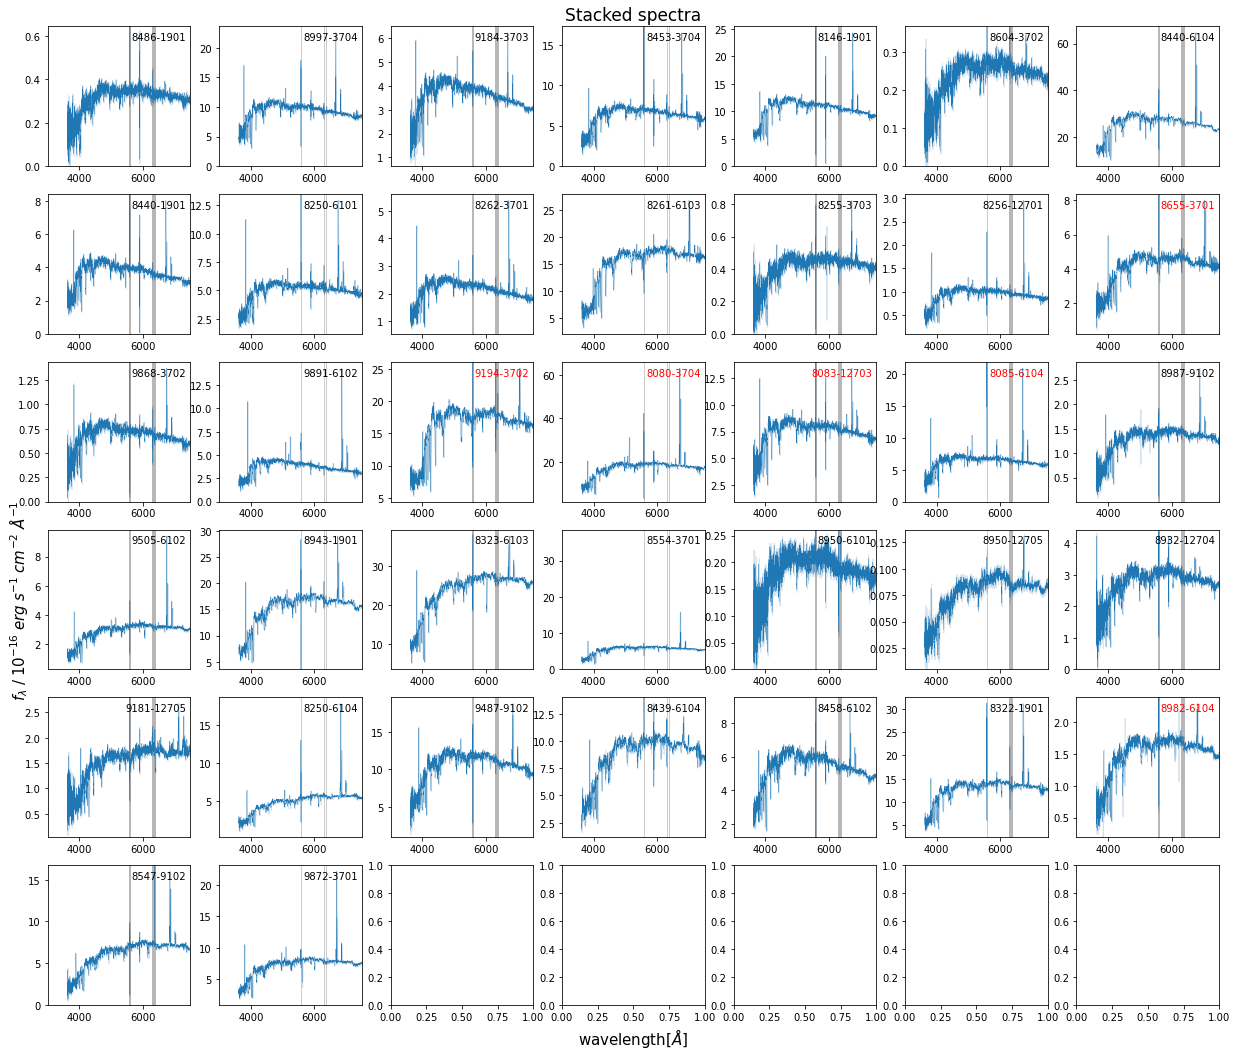

In [57]:
# stacked spectra
for PSB_dict in [CPSBs, RPSBs]:
    PSB_len = len(PSB_dict.keys())
    no_of_rows = PSB_len // plots_per_row + 1
    
    fig, ax = plt.subplots(no_of_rows,plots_per_row, figsize=[3*plots_per_row,3*no_of_rows])
    for i,plateifu in enumerate(PSB_dict.keys()):
        gal = PSB_dict[plateifu]
        axi = ax[i // plots_per_row, i % plots_per_row]
        spec_mask, mask_lims = mask_sky(gal.wavelength)
        spec_masked = np.delete(gal.spectrum, spec_mask)
        if len(spec_masked) > 0:
            ylims = np.array([min(spec_masked[np.delete(gal.wavelength.copy(), spec_mask)<10000]),
                              max(spec_masked[np.delete(gal.wavelength.copy(), spec_mask)<10000])])*10**16
            ylims = [ylims[0]-np.diff(ylims)*0.05, ylims[1]+np.diff(ylims)*0.05]
            axi.plot(gal.wavelength, gal.spectrum*10**16, lw=0.3)
            #print(min(gal.errors), max(gal.errors), np.shape(gal.errors))
            axi.fill_between(gal.wavelength, gal.spectrum*10**16-gal.errors*10**16, gal.spectrum*10**16+gal.errors*10**16,
                            color='steelblue', alpha=0.2)
            for mask_lim_i in mask_lims:
                axi.fill_between(mask_lim_i, ylims[1], ylims[0], color='black', alpha=0.2)
            axi.set_xlim(3000,7500)
            axi.set_ylim([max([ylims[0],0]),ylims[1]])
        if plateifu in list(alma_IDs):
            color='red'
        else: color='black'
        axi.text(0.97,0.9, plateifu, transform=axi.transAxes,color=color, ha='right')
        
    ax[no_of_rows-1,int(plots_per_row/2)].set_xlabel('wavelength[$\AA$]', fontsize=15)
    ax[int(no_of_rows/2),0].set_ylabel('$f_\lambda \;/\; 10^{-16} \;erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$', fontsize=15)
    ax[0,int(plots_per_row/2)].set_title('Stacked spectra', fontsize=17)
    plt.show()